# Name: Dishang Dalwadi
# Reg No.: 24-27-12
# M.Tech Data Science
# Assignment 3

1. Write a function that takes input (x,y) and returns MLE theta using Normal Equation.
Use numpy in python to implement. Create a feature set x using linspace or np.random
function and target values y. Call the function by passing these arguments and plot the
precited values against input data.

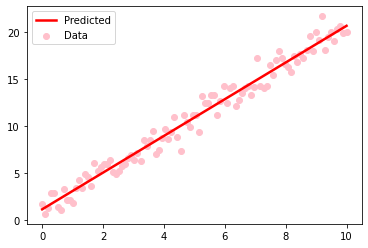

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def mle(x, y):
    X = np.vstack([np.ones(x.shape[0]), x]).T
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return theta

x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, x.shape)

theta = mle(x, y)

X = np.vstack([np.ones(x.shape[0]), x]).T
y_pred = np.dot(X, theta)

plt.scatter(x, y, label='Data', color='pink')
plt.plot(x, y_pred, label='Predicted', color='red', linewidth=2.5)
plt.legend()
plt.show()

2. Write a program to implement polynomial regression and compare it with the result
obtained in the last question by plotting both the hypothesis.

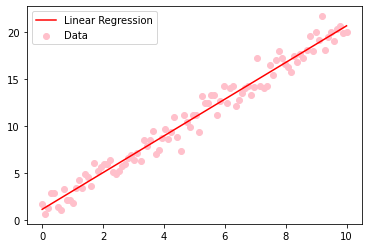

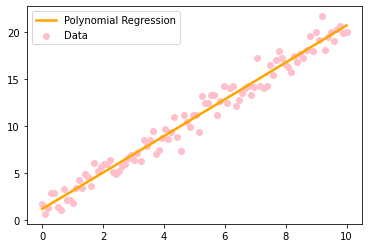

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)
y_poly_predict = poly_reg_model.predict(x_poly)

plt.scatter(x, y, label='Data', color='pink')
plt.plot(x, y_pred, label='Linear Regression', color='red')
plt.legend()
plt.show()

plt.scatter(x, y, label='Data', color='pink')
plt.plot(x, y_poly_predict, label='Polynomial Regression', color='orange', linewidth=2.5)
plt.legend()
plt.show()

3. Access the effects of outliers while training a linear regression by introducing some out-
liers in the data. Propose a solution how these outliers can be detected and removed before training the model. Implement the solution in python.

We can use the following methods for detecting outliers.
1. Z - Score Method:
Calculate the Z-score for each data point, which measures how many standard deviations an element is from the mean.
A common threshold is 2 or 3 (points beyond this are considered outliers).

2. Interquartile Range (IQR) Method:
Calculate the first quartile (Q1) and the third quartile (Q3).
Compute the IQR as IQR = Q3 − Q1.
Define outliers as those points lying in the range
Less than Q1 − 1.5 × IQR or Greater than Q3 + 1.5 × IQR.

3. Visual Methods:
Use box plots or scatter plots to visually identify outliers.

Using these 3 methods we can detect outlier. Once we know where the outliers are we can filter them out from the dataset and then perform linear regression
Implementation using Z - Score:

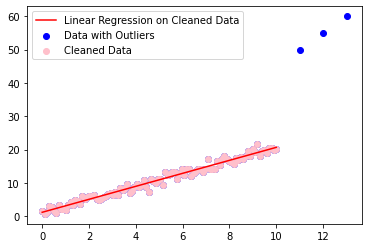

In [19]:
x_out = np.append(x, [11, 12, 13])
y_out = np.append(y, [50, 55, 60])

def zscore(x, y, threshold = 2):
    z_scores = np.abs((y - np.mean(y)) / np.std(y))
    return x[z_scores < threshold], y[z_scores < threshold]

x_clean, y_clean = zscore(x_out, y_out)

mle_clean = mle(x_clean, y_clean)
y_pred_2 = np.c_[np.ones((x_clean.shape[0], 1)), x_clean].dot(mle_clean)

plt.scatter(x_out, y_out, label='Data with Outliers', color='blue')
plt.scatter(x_clean, y_clean, label='Cleaned Data', color='pink')
plt.plot(x_clean, y_pred_2, label='Linear Regression on Cleaned Data', color='red')
plt.legend()
plt.show()